https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset

# Part 1 - EDA

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

from pipelines.nulls_processing import detect_hidden_nulls, replace_hidden_nulls

pd.set_option("display.max_columns", None)

In [41]:
data = pd.read_csv("data/raw_data.csv", sep=";")

In [42]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


 job : type of job
 marital : marital status
 default: has credit in default
 housing: has housing loan
 loan: has personal loan
 contact: contact communication type
 month: last contact month of year
 dayofweek: last contact day of the week
 duration: last contact duration, in seconds
 campaign: number of contacts performed during this campaign and for this client
 pdays: number of days that passed by after the client was last contacted from a previous campaign
 previous: number of contacts performed before this campaign and for this client
 poutcome: outcome of the previous marketing campaign
 emp.var.rate: employment variation rate
 cons.price.idx: consumer price index
 cons.conf.idx: consumer confidence index
 euribor3m: euribor 3 month rate
 nr.employed: number of employees
 y - did client agree to placing deposit

`duration` should be removed - it is known after the call, and we want to predict before calling

In [43]:
data = data.drop("duration", axis=1)

In [44]:
print(data.shape)
data.describe()

(41188, 20)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Features are in different scales

In [45]:
numeric_features = data.select_dtypes(include=[np.number])
categorical_features = data.select_dtypes(include=[object]).drop("y", axis=1)
print(numeric_features.shape)
print(categorical_features.shape)

(41188, 9)
(41188, 10)


In [46]:
categorical_features.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [47]:
pd.Series({column: categorical_features[column].unique() for column in categorical_features})

job            [housemaid, services, admin., blue-collar, tec...
marital                     [married, single, divorced, unknown]
education      [basic.4y, high.school, basic.6y, basic.9y, pr...
default                                       [no, unknown, yes]
housing                                       [no, yes, unknown]
loan                                          [no, yes, unknown]
contact                                    [telephone, cellular]
month          [may, jun, jul, aug, oct, nov, dec, mar, apr, ...
day_of_week                            [mon, tue, wed, thu, fri]
poutcome                         [nonexistent, failure, success]
dtype: object

In [50]:
detect_hidden_nulls(data, data.columns)

Potential hidden nulls:

Column: age

Column: job
Found 330 [0.8%] of unknown

Column: marital
Found 80 [0.19%] of unknown

Column: education
Found 1731 [4.2%] of unknown

Column: default
Found 8597 [20.87%] of unknown

Column: housing
Found 990 [2.4%] of unknown

Column: loan
Found 990 [2.4%] of unknown

Column: contact

Column: month

Column: day_of_week

Column: campaign

Column: pdays
Found 15 [0.04%] of 0

Column: previous
Found 35563 [86.34%] of 0

Column: poutcome

Column: emp.var.rate

Column: cons.price.idx

Column: cons.conf.idx

Column: euribor3m

Column: nr.employed

Column: y


In `pdays`, `999` represents `null` and must be replaced
In `poutcome`, `nonexistent` means no contact was made during previous campaign (attribute is about whether the contact was successful), it's essentially a null
So do `unknown` values

In [51]:
data = replace_hidden_nulls(
    data, data.columns.tolist(), custom_values={"pdays": [999], "poutcome": ["nonexistent"]}
)
data.isna().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
campaign              0
pdays             39673
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

<AxesSubplot:>

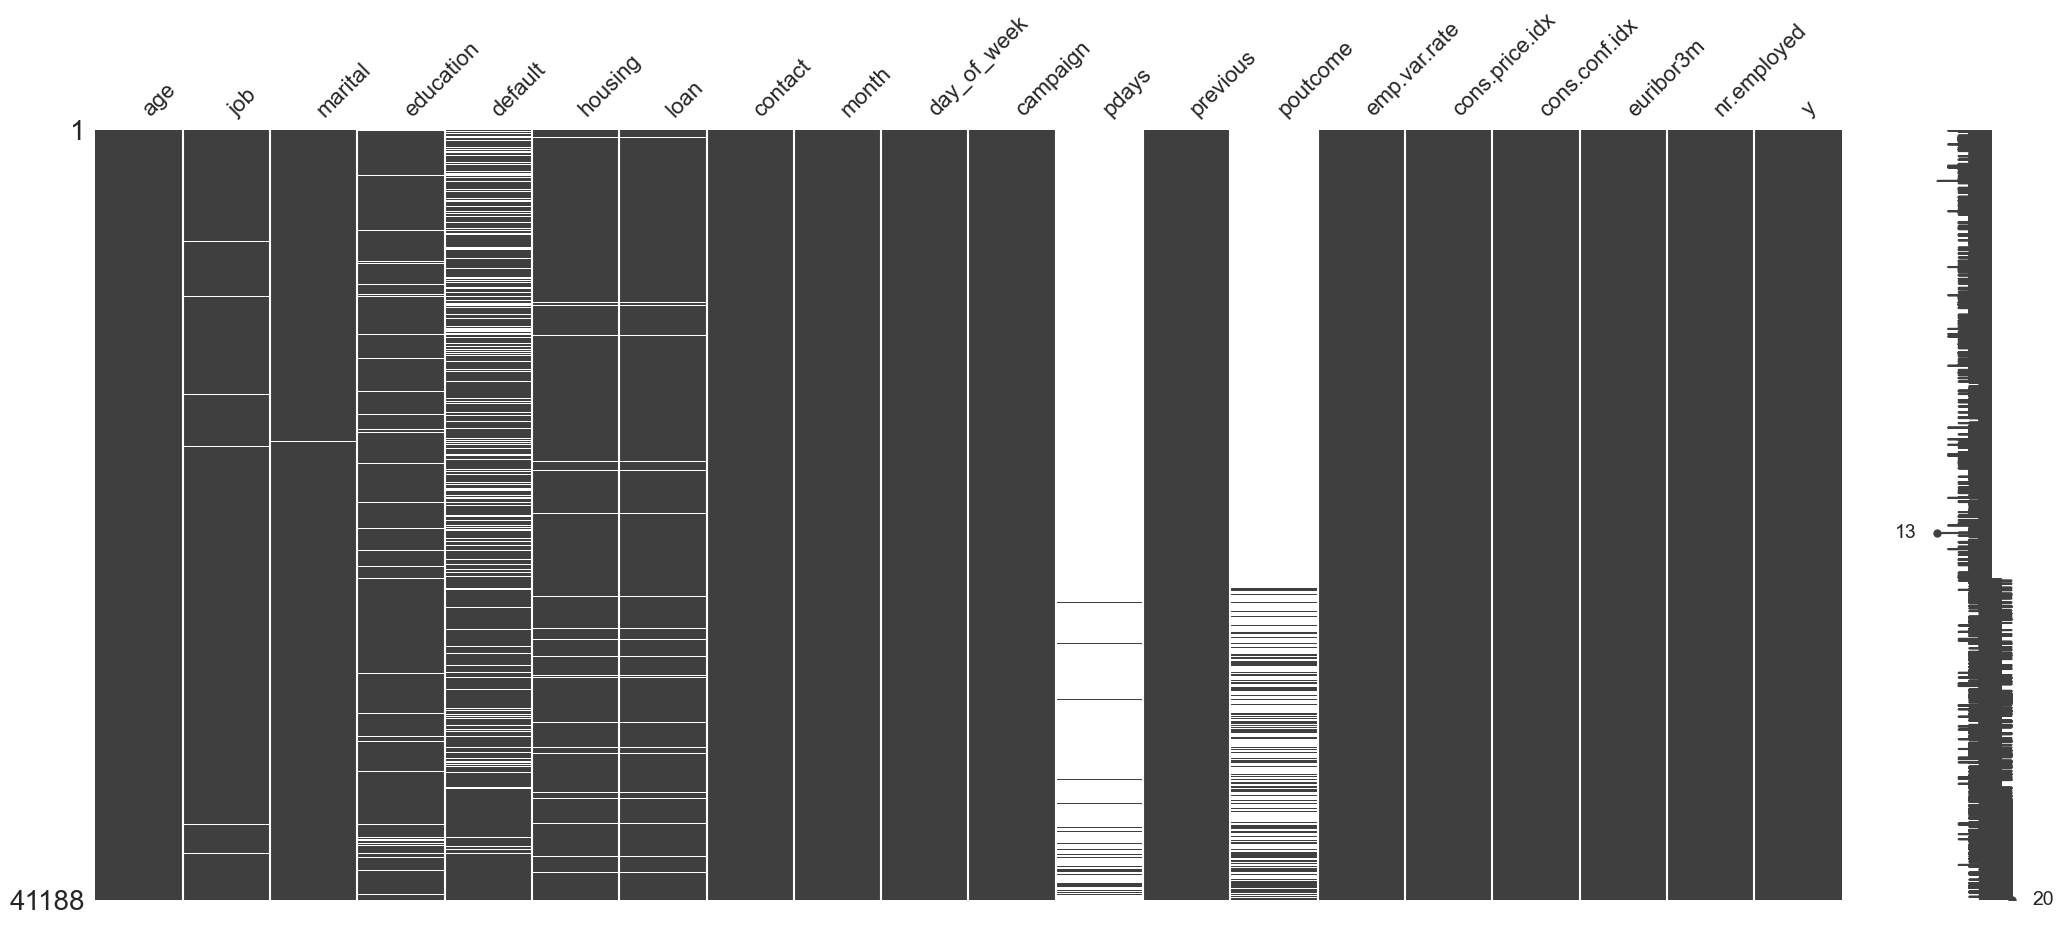

In [52]:
msno.matrix(data)

Dropping `pdays` and `poutcome` attributes should be considered due to large amount of missing data

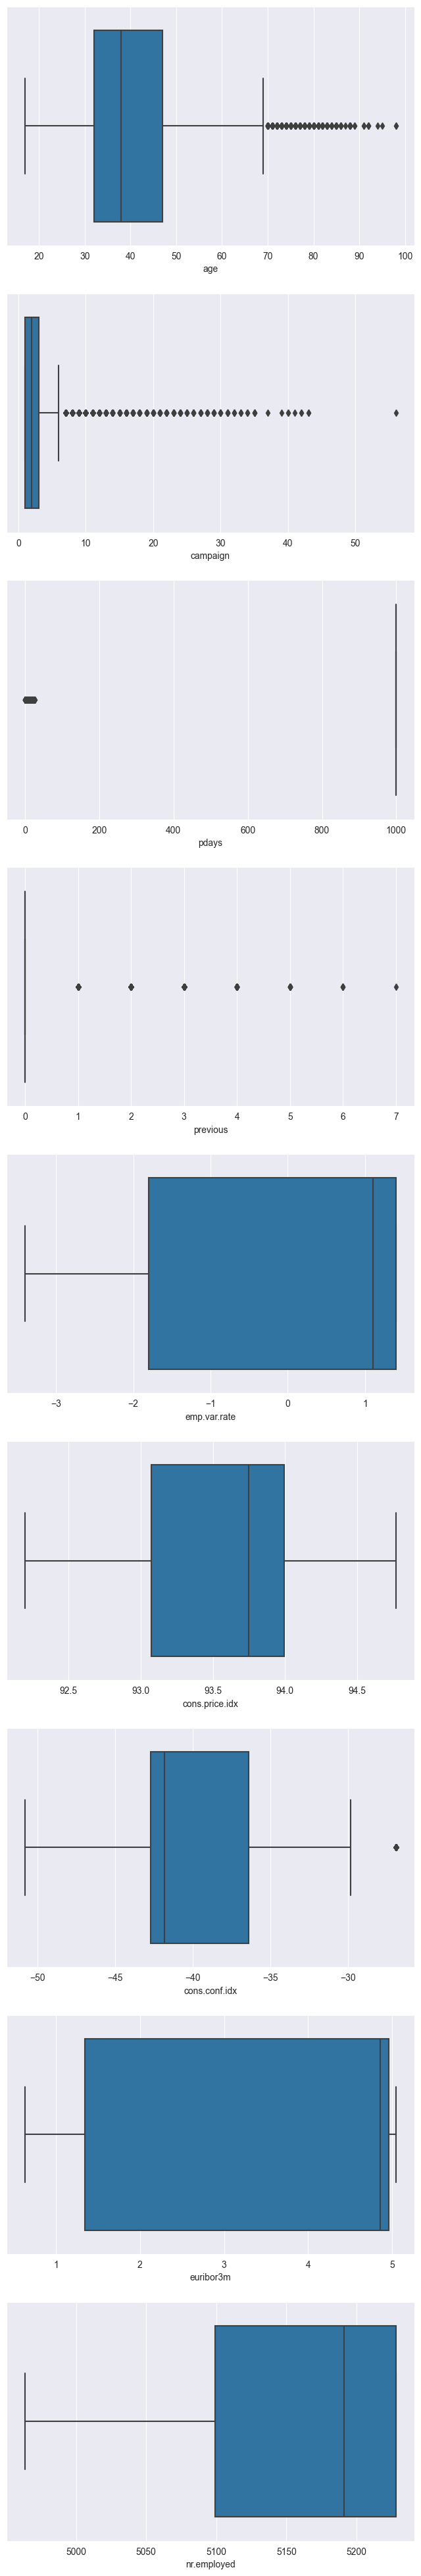

In [53]:
_, axes = plt.subplots(numeric_features.columns.size, figsize=(8, 50))

for feature, ax in zip(numeric_features.columns, axes):
    sns.boxplot(numeric_features, x=feature, ax=ax)

An outlier in `cons.conf.idx`, `campaign` can be seen and 3 in `pdays`. \
What's marked as outliers in `age`, `campaign` and `pdays` is just result of concentration of values on one side of broad scale

<AxesSubplot:xlabel='y', ylabel='Percent'>

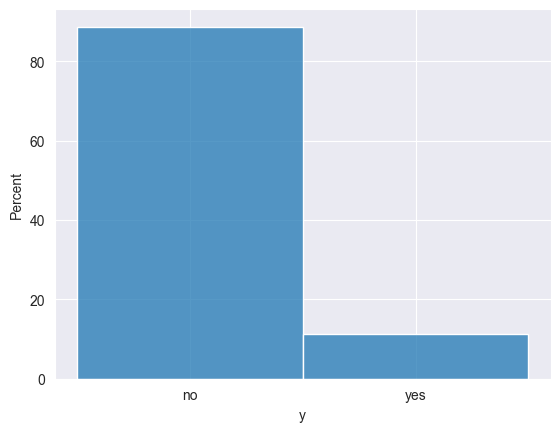

In [54]:
sns.histplot(data=data, x="y", stat="percent")

<AxesSubplot:>

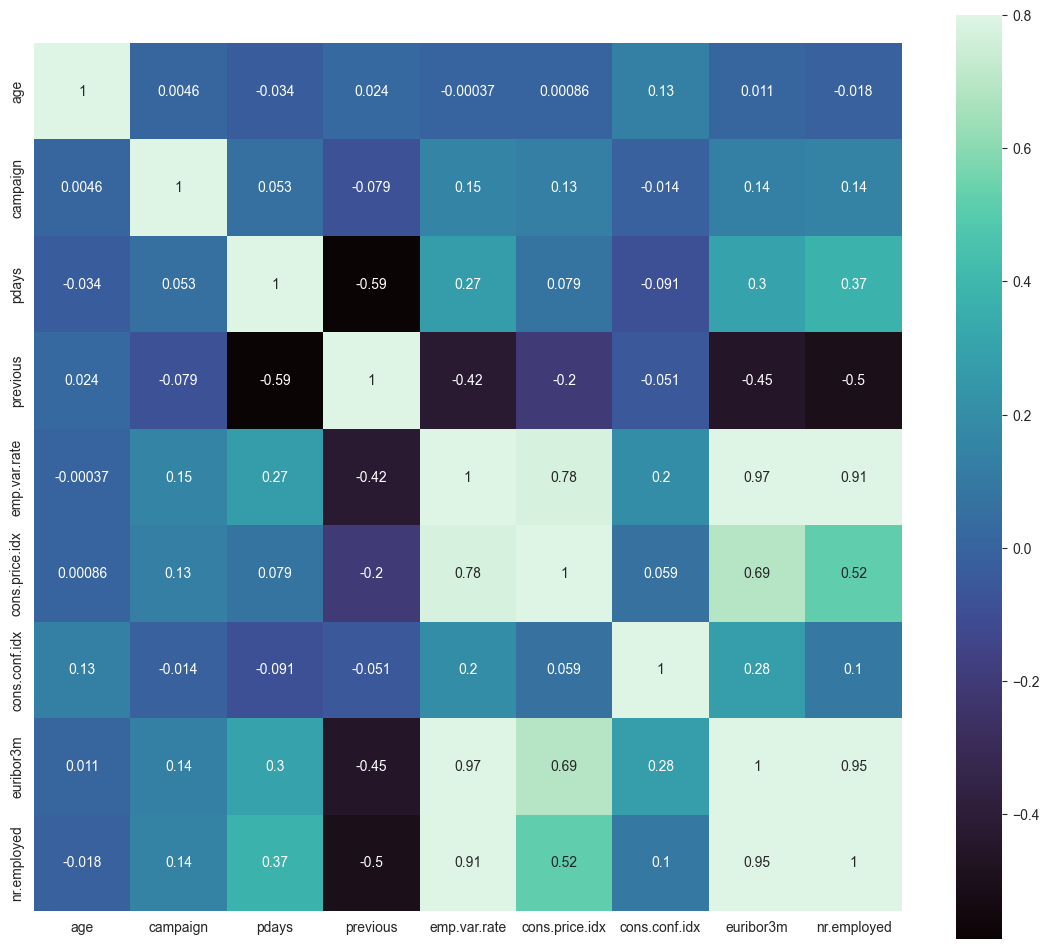

In [55]:
correlation_matrix = numeric_features.corr()  # linear correlation
plt.subplots(figsize=(14, 12))
sns.heatmap(correlation_matrix, square=True, vmax=0.8, annot=True, cmap="mako")

<AxesSubplot:>

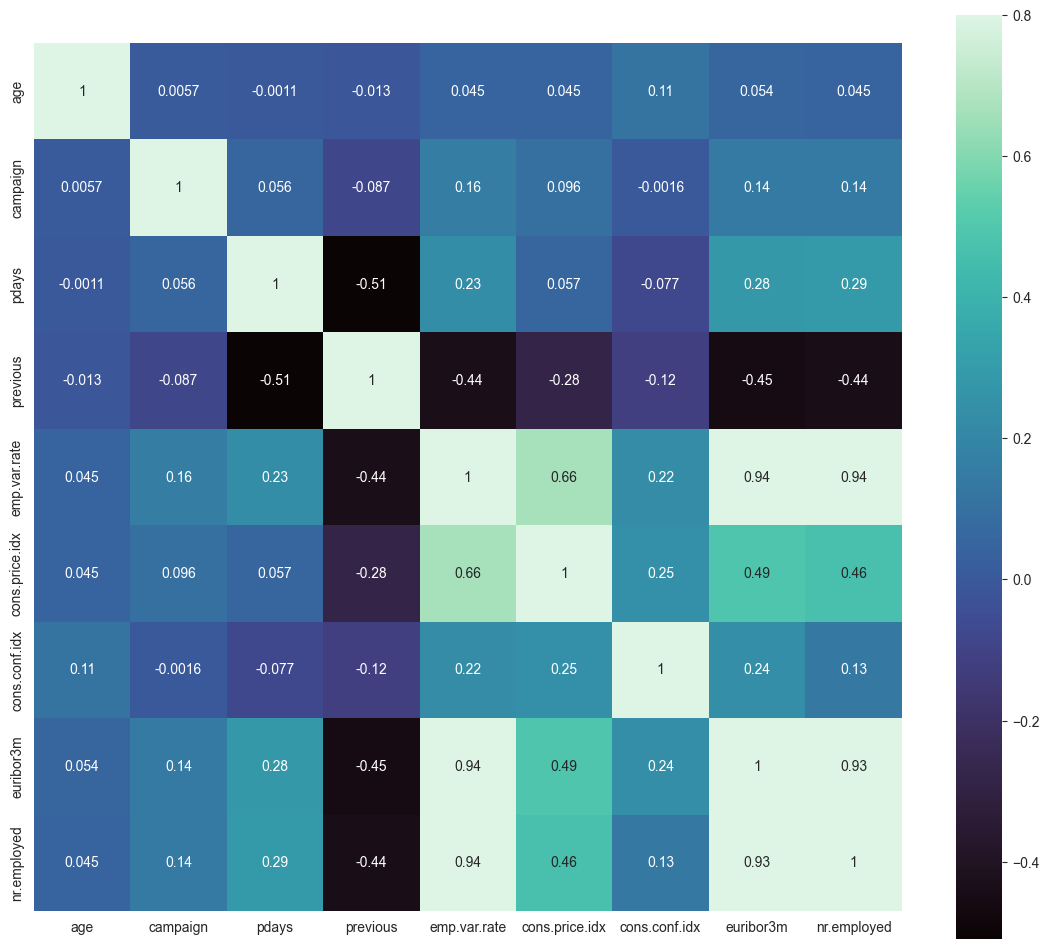

In [56]:
correlation_matrix = numeric_features.corr(
    method="spearman"
)  # monotonic correlation (doesn't have to be linear)
plt.subplots(figsize=(14, 12))
sns.heatmap(correlation_matrix, square=True, vmax=0.8, annot=True, cmap="mako")

`cons.price.idx` and `emp.var.rate` are noticeably correlated positively \
`nr.employed` and `euribor3m` are less correlated positively

`cons.conf.idx` and `emp.var.rate` are noticeably correlated negatively, they might be some kind of opposite coefficients \
`cons.price.idx` and `nr.employed` are less correlated negatively \
`cons.price.idx` and `cons.conf.idx` are less correlated negatively

Removing `euribor3m` and `emp.var.rate` could be considered

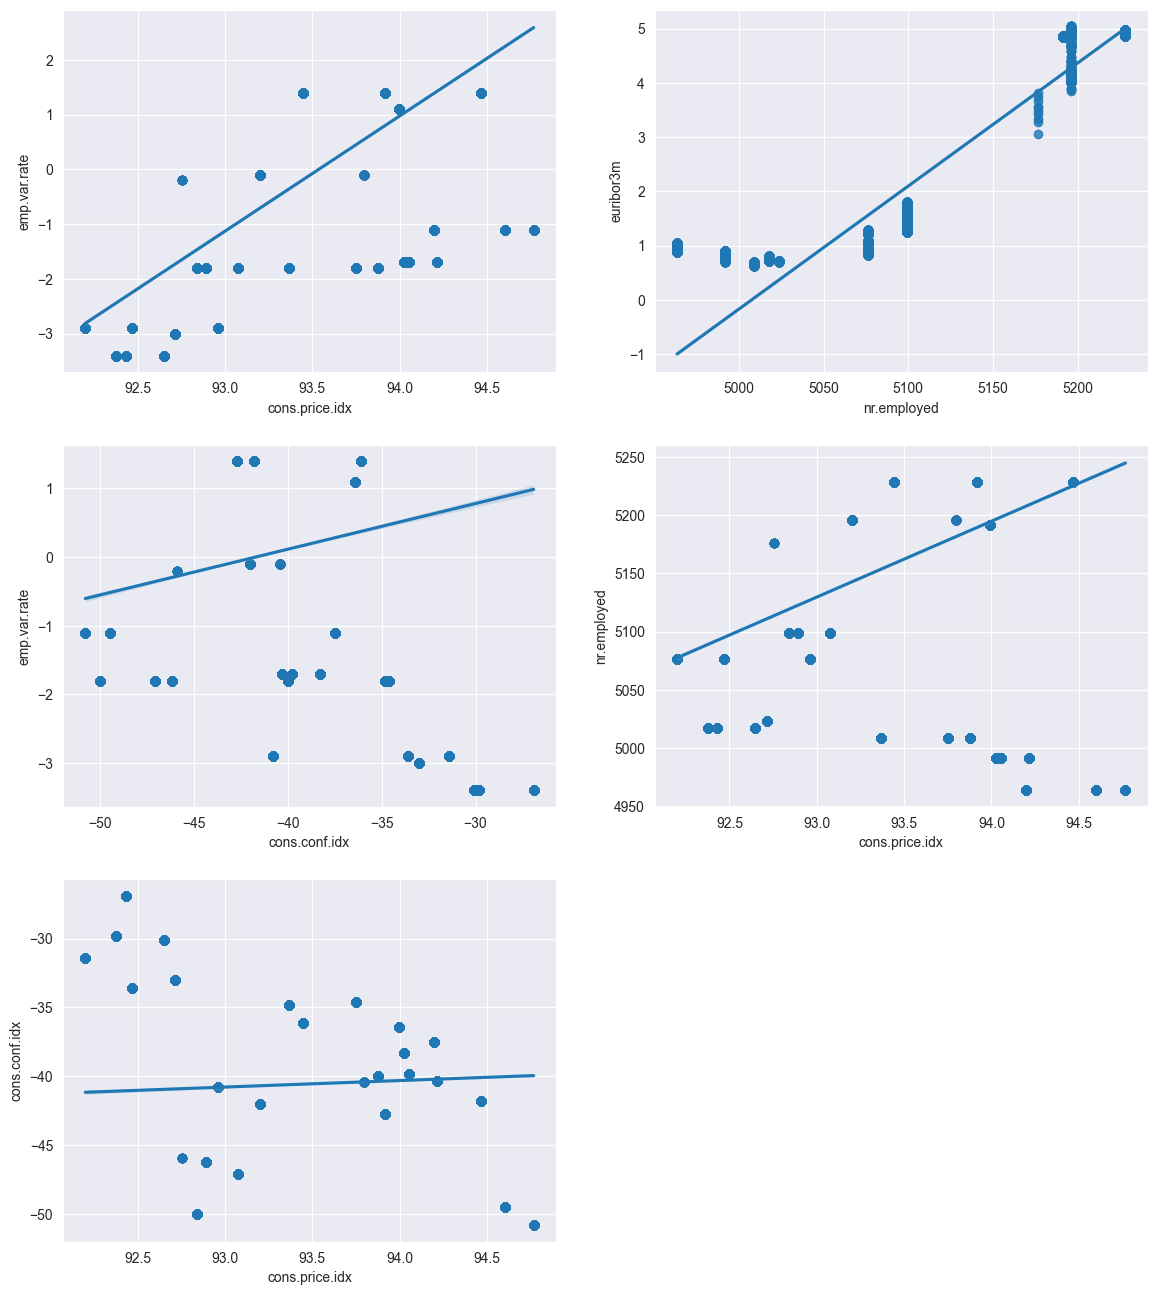

In [57]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

sns.regplot(x="cons.price.idx", y="emp.var.rate", data=numeric_features, fit_reg=True, ax=ax1)
sns.regplot(x="nr.employed", y="euribor3m", data=numeric_features, fit_reg=True, ax=ax2)
sns.regplot(x="cons.conf.idx", y="emp.var.rate", data=numeric_features, fit_reg=True, ax=ax3)
sns.regplot(x="cons.price.idx", y="nr.employed", data=numeric_features, fit_reg=True, ax=ax4)
sns.regplot(x="cons.price.idx", y="cons.conf.idx", data=numeric_features, fit_reg=True, ax=ax5)
fig.delaxes(ax6)

`nr.employed` and `euribor3m` have exponential relation, others are linear

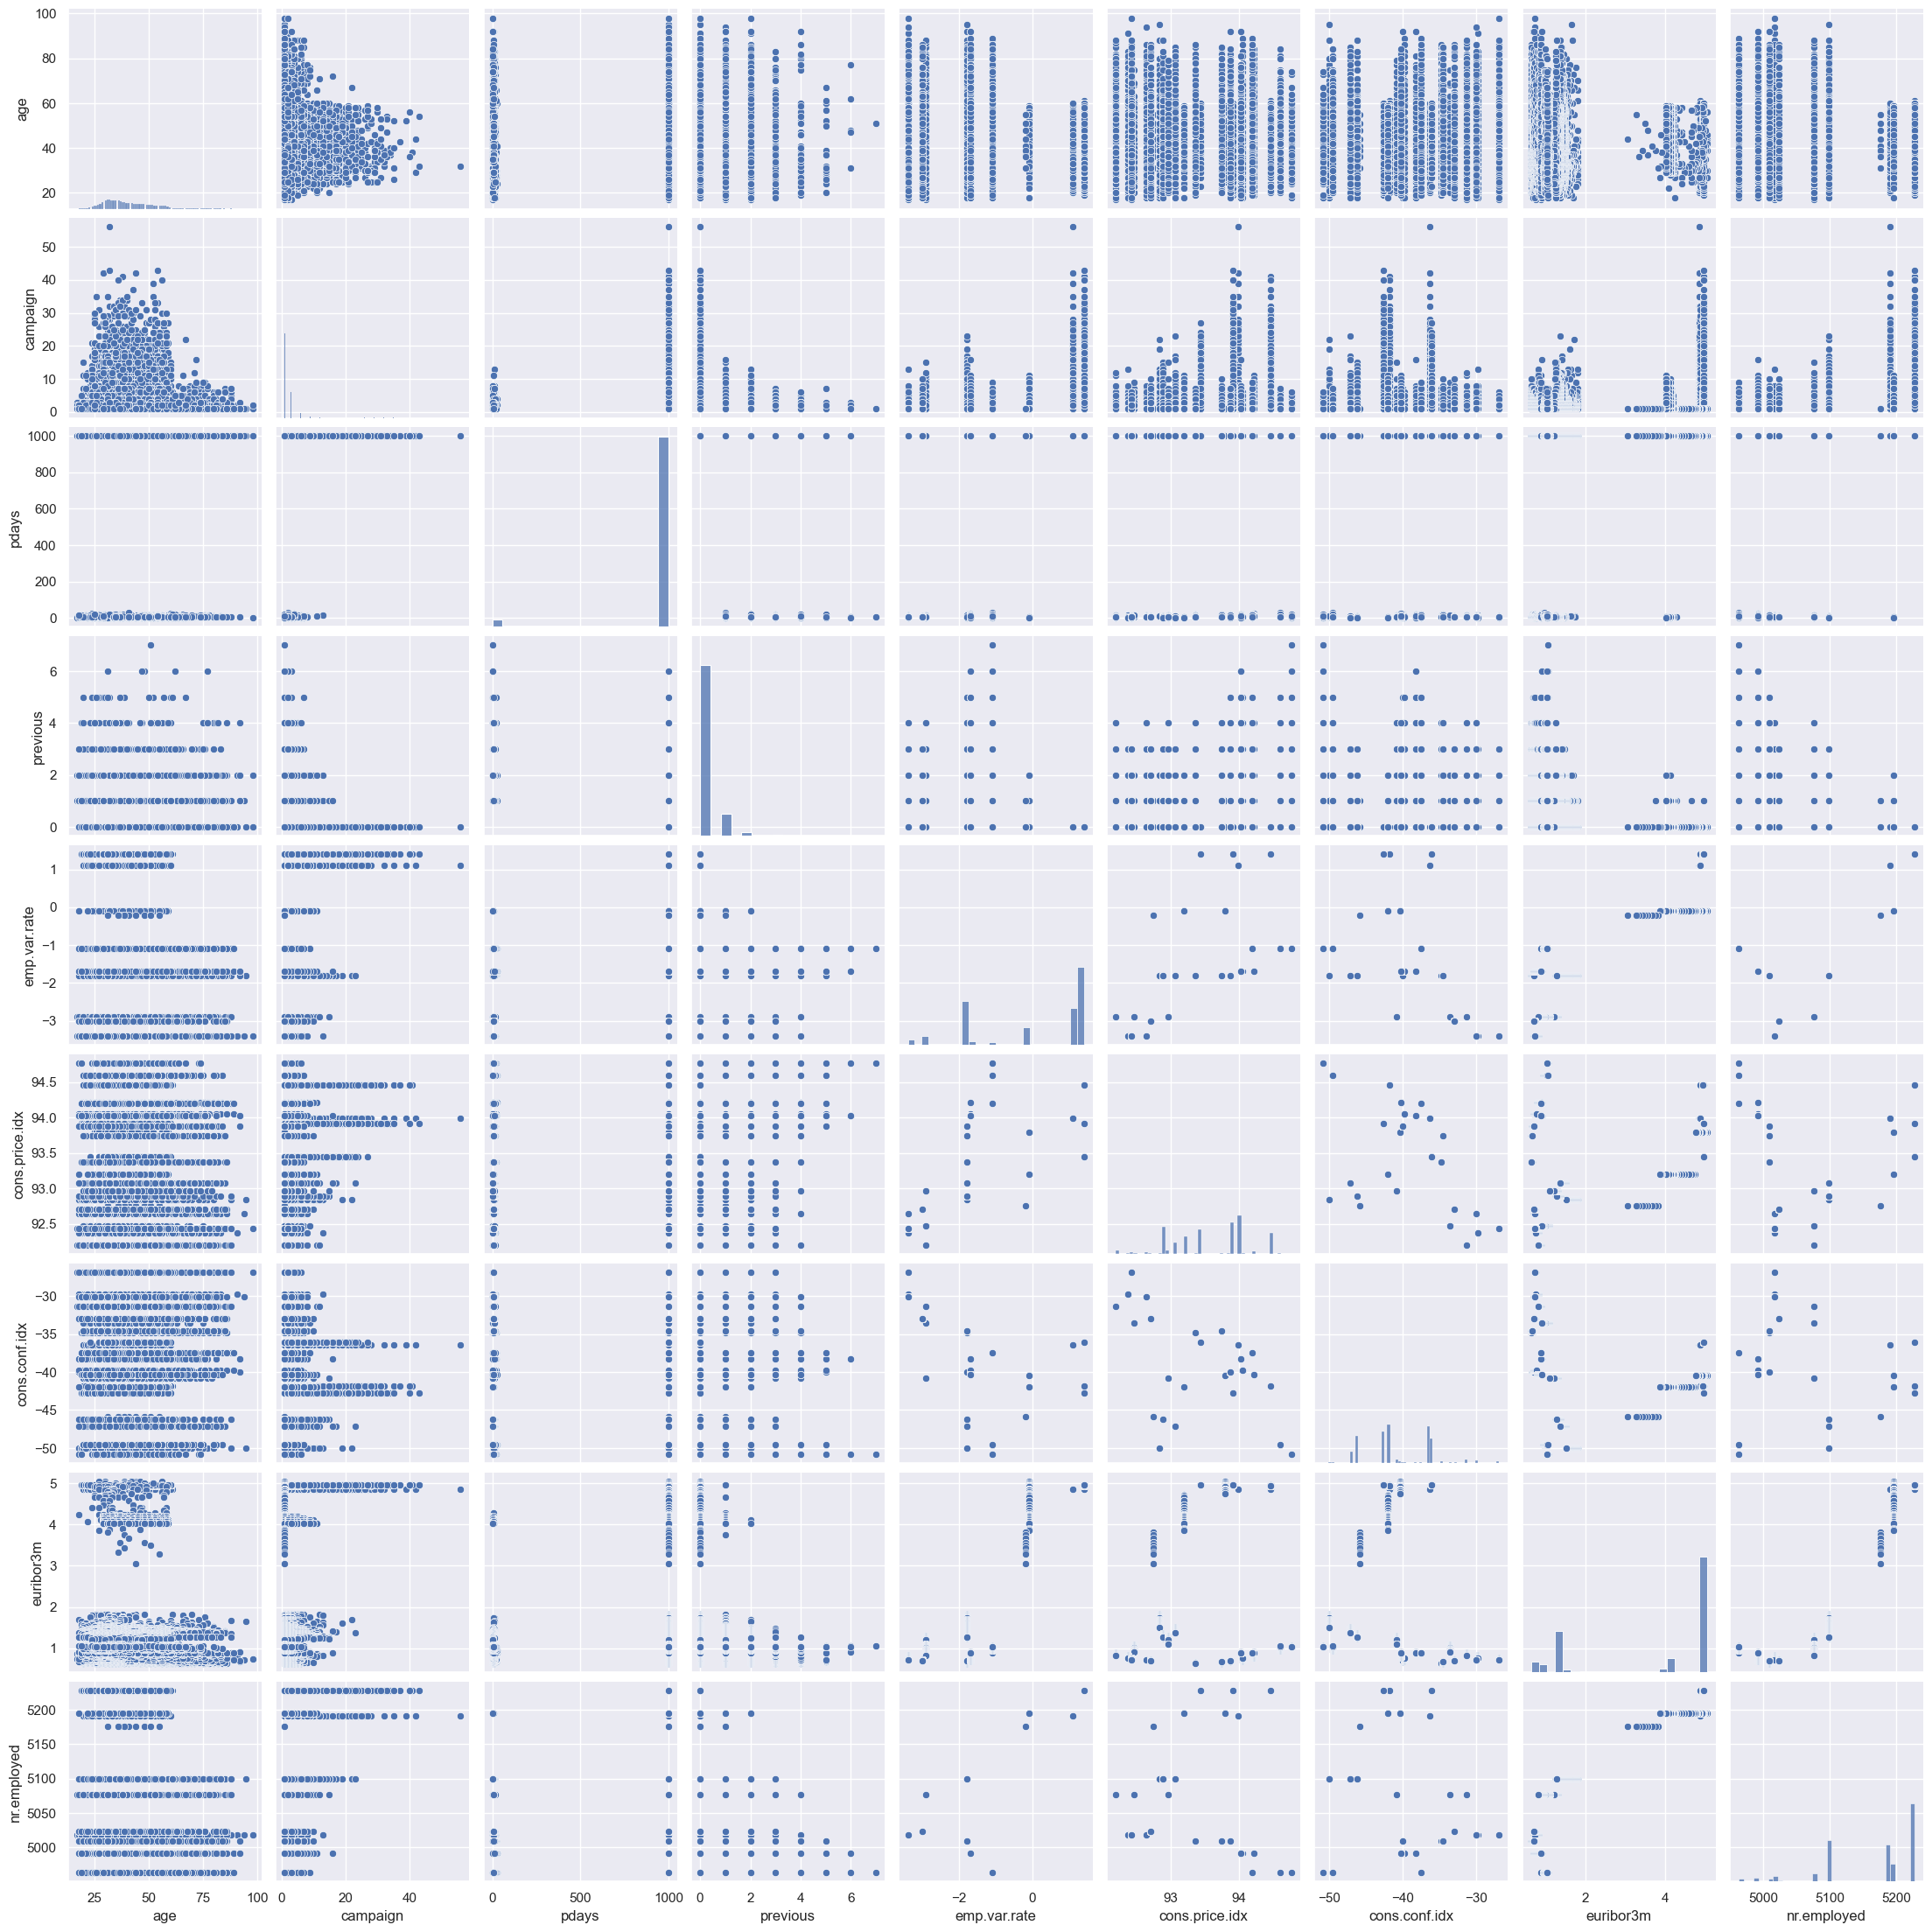

In [58]:
sns.set()
sns.pairplot(numeric_features, kind="scatter")
plt.show()

There seems to be linear lower bound in relation of `cons.price.ixd` and `pdays` - minimal "value" of client raises with time without answer since campaign
`euriborn3m` is split into 2 groups of extreme values

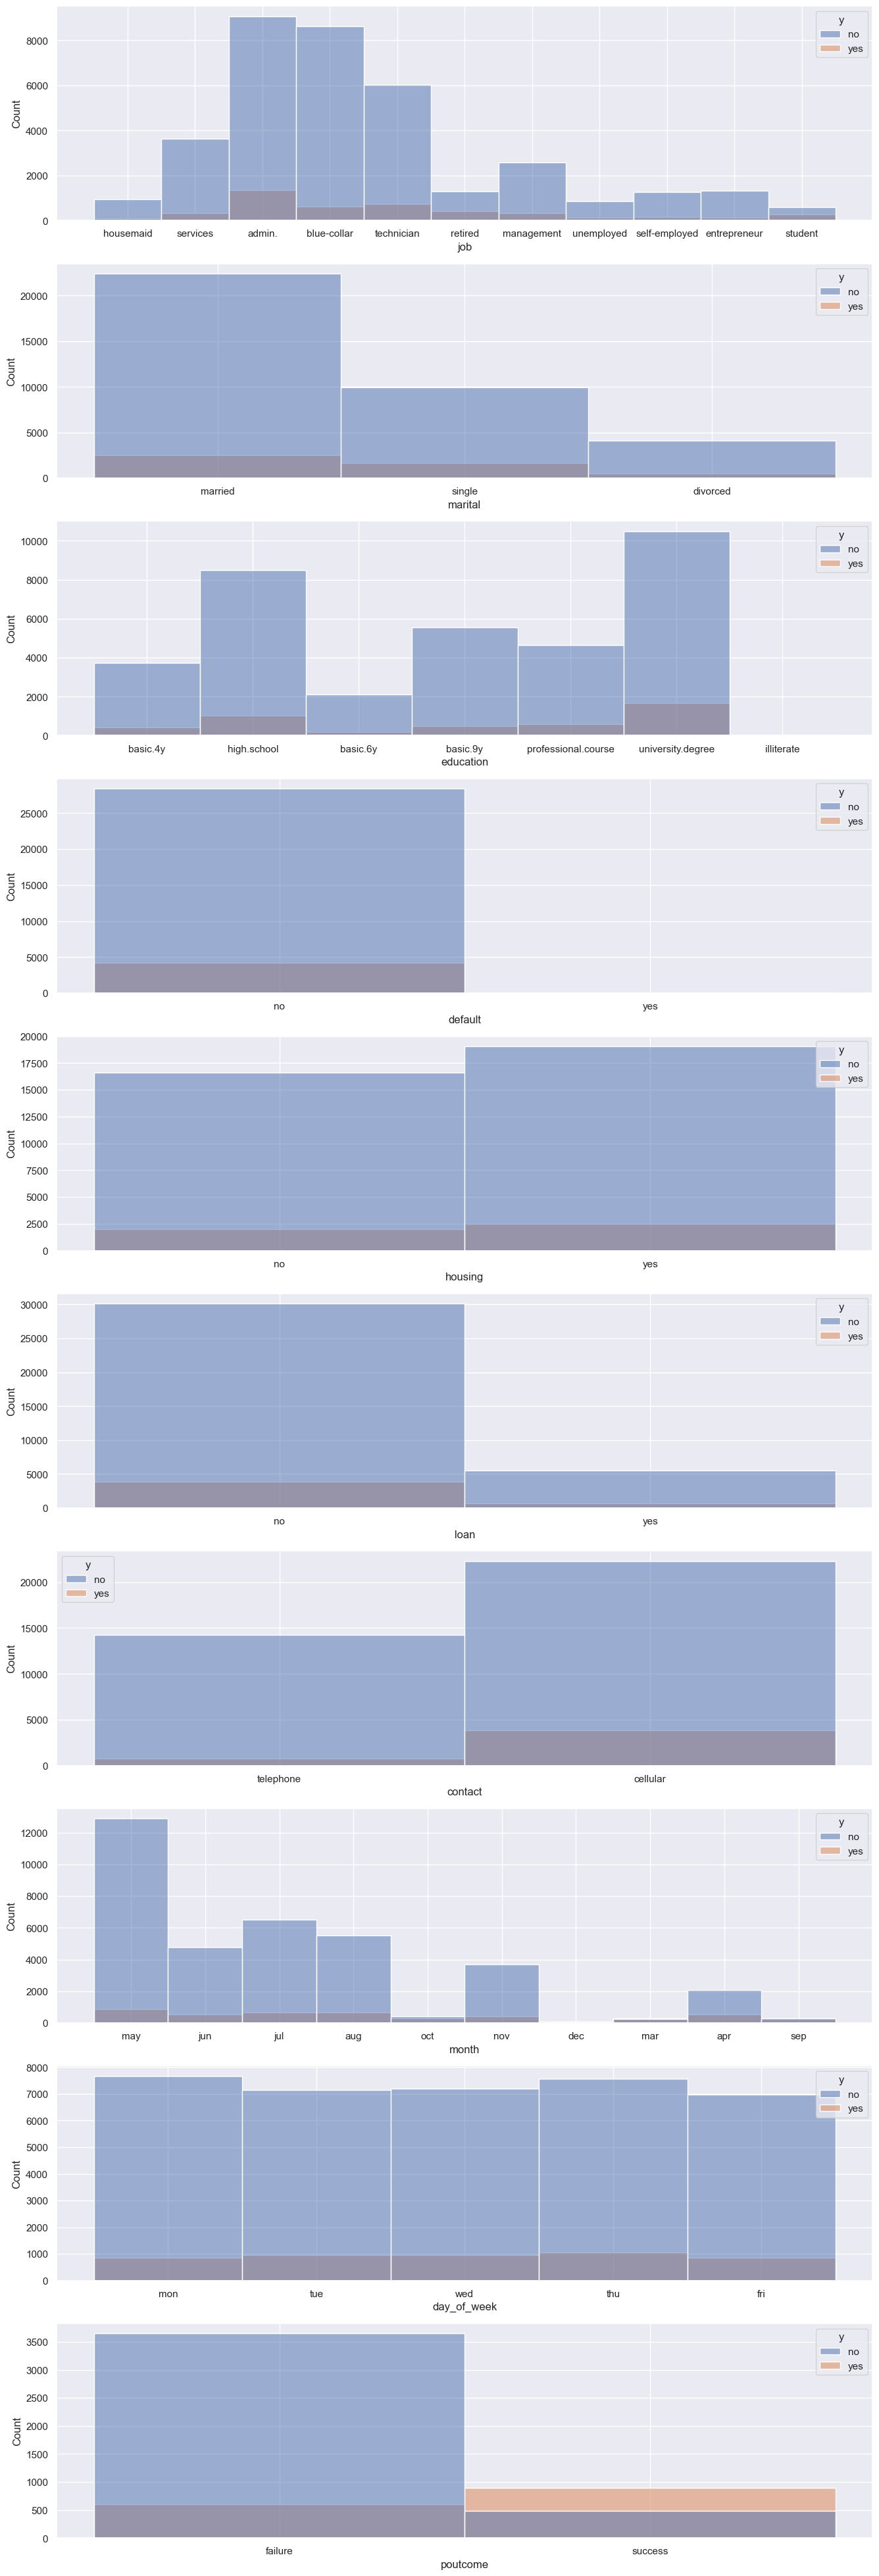

In [62]:
_, axes = plt.subplots(nrows=10, ncols=1, figsize=(16, 50))
categorical_features = data.select_dtypes(include=[object]).drop("y", axis=1)

for column, ax in zip(categorical_features.columns, axes):
    sns.histplot(x=column, data=data, stat="count", ax=ax, hue="y")

Worth noticing: \
Many features have `unknown` values representing `null` \
Most targets have well paid job and at least secondary education, it might explain low percentage of targets with loan \
There is a noticeable increase of number of contacts in May - marketing campaign might have taken place then \
There is a noticeable percentage of married targets (distribution of martial status in the country could be checked)

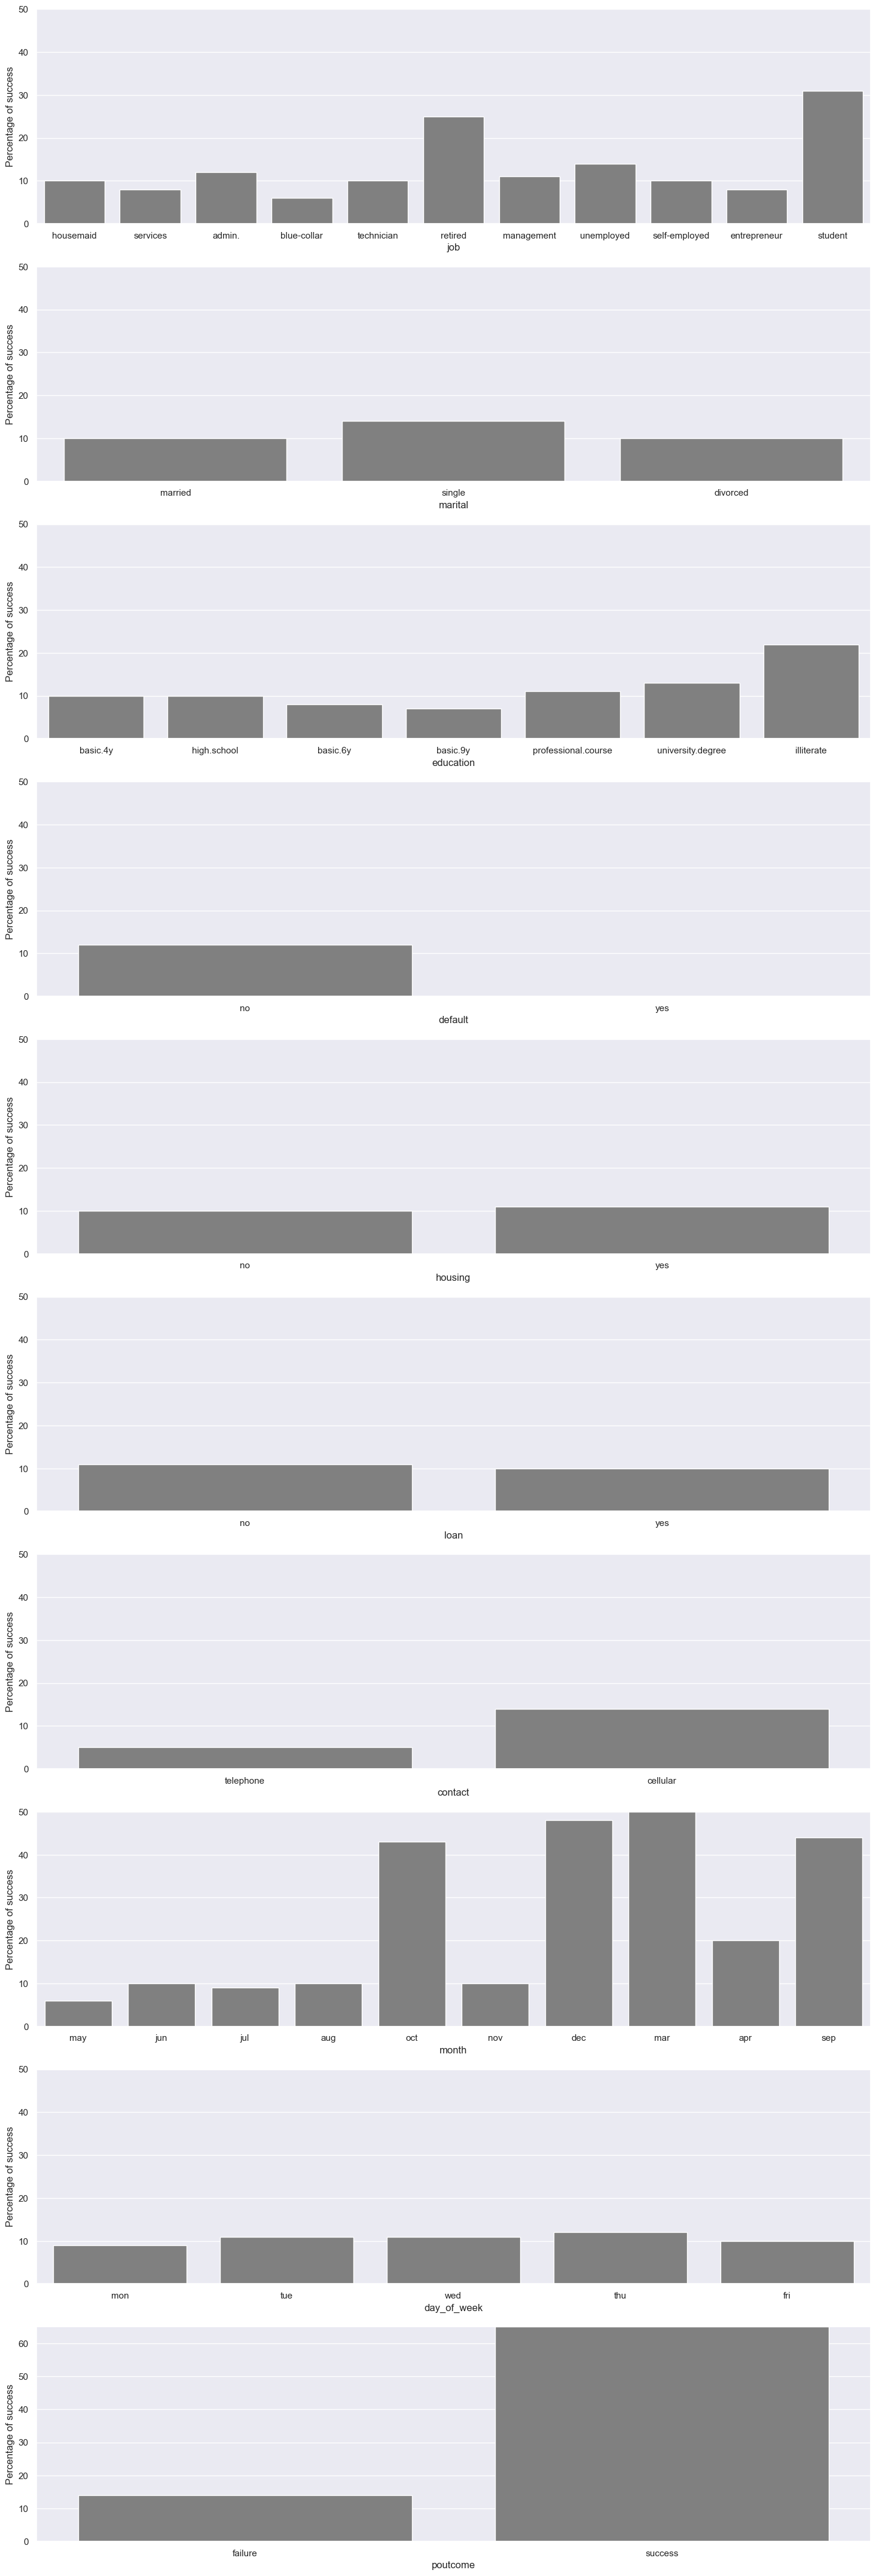

In [63]:
_, axes = plt.subplots(nrows=10, ncols=1, figsize=(18, 55))

for column, ax in zip(categorical_features.columns, axes):
    percentages_of_success = []

    for value in categorical_features[column].unique():
        value_occurrences_number = len(data[data[column] == value])
        number_of_successes_when_value = len(data[(data[column] == value) & (data["y"] == "yes")])
        percentage_of_success = int(
            (number_of_successes_when_value / value_occurrences_number * 100)
        ) if value_occurrences_number != 0 else 0
        percentages_of_success.append((value, percentage_of_success))

    data_with_percentage = pd.DataFrame(
        percentages_of_success, columns=[column, "Percentage of success"]
    )
    ax.set_ylim(0, max([x[1] for x in percentages_of_success] + [50]))  # Keep charts in same scale
    sns.barplot(
        y="Percentage of success",
        x=column,
        data=data_with_percentage,
        ax=ax,
        color="gray",
    )

Worth noticing:
No interest among targets with a loan
High success percentage among targets convinced during previous campaign
The Highest success percentage in months with the lowest number of contacts:
probably bank was only contacting promising targets or those were clients unaware of campaign calling by themselves

Month feature should be removed as next marketing campaign can occur in other month
and the percent of targets agreeing to place deposit in months with the lowest number of contacted targets is unnaturally high - looks selective

# Part 2 - data cleanup

In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from pipelines.boolean_features import replace_obscured_booleans
from pipelines.categorical_features import encode_categorical_columns
from pipelines.generic import drop_columns
from pipelines.nulls_processing import (
    replace_hidden_nulls,
    replace_nulls_in_numeric_columns,
    replace_nulls_in_categorical_columns,
)
from pipelines.numeric_features import (
    winsortize_outliers_in_columns,
    standardize_numeric_columns,
)

In [2]:
data = pd.read_csv("data/raw_data.csv", sep=";")

boolean_columns = ["default", "housing", "loan"]

data = replace_obscured_booleans(data, boolean_columns + ["y"])
data = replace_hidden_nulls(data, data.columns.tolist())

data = drop_columns(
    data,
    [
        "euribor3m",  # high correlation with cons.conf.idx
        "emp.var.rate",  # high correlation with emp.var.rate
        "duration",  # is known only after the call
        "month",  # unnatural correlation with result, also won't matter if next campaign is in another month
        "pdays",  # 96% of values are nulls
        "poutcome",  # 86% of values are nulls
    ],
)

X = data.drop(columns=["y"])
y = data["y"]

numeric_columns = X.select_dtypes(include=[np.number]).columns.values.tolist()
categorical_columns = X.select_dtypes(exclude=[np.number]).columns.values.tolist()

for column in boolean_columns:
    numeric_columns.remove(column)

# Part 3 - data preprocessing

Split data into training and test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Replace nulls in numeric attributes with mean values

In [4]:
X_train, X_test = replace_nulls_in_numeric_columns(
    X_train, X_test, numeric_columns, strategy="mean"
)

Replace nulls in categorical attributes with most common values

In [5]:
X_train, X_test = replace_nulls_in_categorical_columns(
    X_train, X_test, categorical_columns + boolean_columns, strategy="most_frequent"
)

Encode education level taking ordinality into account

In [6]:
categorical_columns.remove("education")

X_train, X_test = encode_categorical_columns(
    X_train,
    X_test,
    "education",
    strategy="ordinal",
    categories=[
        "illiterate",
        "basic.4y",
        "basic.6y",
        "basic.9y",
        "high.school",
        "professional.course",
        "university.degree",
    ],
)

Encode day of week with sine and cosine - it's a cyclical, categorical data

In [7]:
categorical_columns.remove("day_of_week")
X_train, X_test = encode_categorical_columns(
    X_train,
    X_test,
    "day_of_week",
    strategy="ordinal",
    categories=["mon", "tue", "wed", "thu", "fri"],
)
X_train, X_test = encode_categorical_columns(
    X_train, X_test, ["day_of_week"], strategy="trigonometric"
)

Encode rest of categorical attributes with one hot encoding

In [8]:
X_train, X_test = encode_categorical_columns(
    X_train, X_test, categorical_columns, strategy="onehot"
)

Winsortize numerical columns - outlier values could skew standardisation

In [9]:
X_train, X_test = winsortize_outliers_in_columns(
    X_train,
    X_test,
    numeric_columns,
    capping_method="gaussian",  # +- 3 standard deviations are the limits
)

Standardise numeric attributes and ordinal encoded education level

In [10]:
X_train, X_test = standardize_numeric_columns(X_train, X_test, numeric_columns + ["education"])

# Part 4 - Hyperparameter optimization

Only 10% of targets agreed.
If we train on such data, increasing accuracy of guessing `0` result would eclipse `1` results - which are the real point of interest.
Oversampling is used to balance out the dataset

In [74]:
over_sampler = RandomOverSampler()
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

Optimizing hyper parameters of chosen models using grid search with 3-fold cross validation.
Using recall - we should be interested in maximising the change of success while not losing the potential targets

In [ ]:
scoring = "recall"  # how many positive results are correctly detected out of total number of positive results
verbose = 2

print("SVC")
C = [0.001, 0.01, 0.1, 1, 5, 10]  # increases the penalty when scoring vectors
kernel = ["linear", "rbf", "poly", "sigmoid"]  # function types responsible for splitting the set
classifier = SVC()

grid = GridSearchCV(
    classifier,
    param_grid={"C": C, "kernel": kernel},
    n_jobs=-1,
    cv=3,
    scoring=scoring,
    verbose=verbose,
)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

print("KNN")
n_neighbors = range(1, 50)  # number of the nearest points from which the result is established
weights = ["uniform", "distance"]  # how we measure distance to point

classifier = KNeighborsClassifier()

grid = GridSearchCV(
    classifier,
    n_jobs=-1,
    cv=3,
    scoring=scoring,
    param_grid={"n_neighbors": n_neighbors, "weights": weights},
    verbose=verbose,
)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

print("Logistic Regression")
C = [0.001, 0.01, 0.1, 1, 5, 10]  # increases the penalty when scoring vectors

classifier = LogisticRegression()

grid = GridSearchCV(
    classifier,
    n_jobs=-1,
    cv=3,
    scoring=scoring,
    param_grid={"C": C},
    verbose=verbose,
)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

print("Gaussian Naive Bayes")
classifier = GaussianNB()
grid = GridSearchCV(
    classifier,
    {},
    n_jobs=-1,
    cv=3,
    scoring="roc_auc",
    verbose=verbose,
)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

print("Decision Tree")
max_depth = range(1, 6)  # max height of decision tree
criterion = [
    "gini",
    "entropy",
]  # how we measure the quality of splitting the data using given condition

classifier = DecisionTreeClassifier()
grid = GridSearchCV(
    classifier,
    n_jobs=-1,
    cv=3,
    scoring=scoring,
    param_grid={"criterion": criterion, "max_depth": max_depth},
    verbose=verbose,
)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

print("Random Forest")
max_depth = range(2, 6)  # max height of decision tree
criterion = [
    "gini",
    "entropy",
]  # how we measure the quality of splitting the data using given condition

classifier = RandomForestClassifier()
grid = GridSearchCV(
    classifier,
    n_jobs=-1,
    cv=3,
    scoring=scoring,
    param_grid={"criterion": criterion, "max_depth": max_depth},
    verbose=verbose,
)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

print("XGBoost")
max_depth = range(1, 6)  # max height of decision tree
learning_rate = [
    0.0001,
    0.001,
    0.01,
    0.1,
    0.2,
    0.3,
]  # manipulate the impact of given iteration result's on coefficients change

classifier = XGBClassifier()

grid = GridSearchCV(
    classifier,
    n_jobs=-1,
    cv=3,
    scoring=scoring,
    param_grid={
        "max_depth": max_depth,
        "learning_rate": learning_rate,
    },
    verbose=verbose,
)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

# Part 5 - model selection

Best hyper parameters for all models

SVC 0.7457402418947843 {'C': 10, 'kernel': 'rbf'}
KNN 0.9980299001110488 {'n_neighbors': 29, 'weights': 'distance'}
Logistic Regression 0.7005727691485663 {'C': 0.001}
Gaussian Naive Bayes 0.7476992616750553 {}
Decision Tree 0.6023567652254093 {'criterion': 'gini', 'max_depth': 2}
Random Forest 0.6242105161100587 {'criterion': 'entropy', 'max_depth': 5}
XGBoost 0.7323503861981342 {'learning_rate': 0.3, 'max_depth': 5}

In [11]:
def test_model(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    matrix = confusion_matrix(y_test, y_pred)
    print(matrix)
    print(
        "Probability ", matrix[1][1] / (matrix[0][1] + matrix[1][1])
    )  # Probability of success if we only take true and false negatives into account
    print("Original probability ", sum(matrix[1]) / sum(matrix[0] + matrix[1]))
    print(
        "Loss of targets ", matrix[1][0] / sum(matrix[1])
    )  # what part of clients was flagged false negative
    print(
        "Probability gain / target loss ratio ",
        (
            (matrix[1][1] / (matrix[0][1] + matrix[1][1]))
            - sum(matrix[1]) / sum(matrix[0] + matrix[1])
        )
        / (matrix[1][0] / sum(matrix[1])),
    )
    print(
        "Reduction of targets number",
        sum(matrix[0] + matrix[1])
        / (matrix[0][1] + matrix[1][1]),  # How many targets were flagged as failure
    )
    print(
        "Targets number reduction / loss of targets ratio ",
        (
            (matrix[0][1] + matrix[1][1])
            / sum(matrix[0] + matrix[1])
            / (matrix[1][0] / sum(matrix[1]))
        ),
    )
    print()

In [12]:
classifier = SVC(C=10, kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
test_model(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9139
           1       0.53      0.20      0.29      1158

    accuracy                           0.89     10297
   macro avg       0.72      0.59      0.61     10297
weighted avg       0.86      0.89      0.87     10297

[[8940  199]
 [ 930  228]]
Probability  0.5339578454332553
Original probability  0.11245993978828785
Loss of targets  0.8031088082901554
Probability gain / target loss ratio  0.524832876061153
Reduction of targets number 24.114754098360656
Targets number reduction / loss of targets ratio  0.0516348325694612



In [13]:
classifier = KNeighborsClassifier(n_neighbors=29, weights="distance")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
test_model(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9139
           1       0.55      0.23      0.32      1158

    accuracy                           0.89     10297
   macro avg       0.73      0.60      0.63     10297
weighted avg       0.87      0.89      0.87     10297

[[8923  216]
 [ 896  262]]
Probability  0.5481171548117155
Original probability  0.11245993978828785
Loss of targets  0.7737478411053541
Probability gain / target loss ratio  0.5630480524521532
Reduction of targets number 21.5418410041841
Targets number reduction / loss of targets ratio  0.05999536966384106



In [14]:
classifier = LogisticRegression(C=0.001)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
test_model(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9139
           1       0.63      0.04      0.07      1158

    accuracy                           0.89     10297
   macro avg       0.76      0.52      0.51     10297
weighted avg       0.86      0.89      0.84     10297

[[9112   27]
 [1112   46]]
Probability  0.6301369863013698
Original probability  0.11245993978828785
Loss of targets  0.9602763385146805
Probability gain / target loss ratio  0.5390917444803498
Reduction of targets number 141.05479452054794
Targets number reduction / loss of targets ratio  0.007382711874590838



In [15]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
test_model(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.46      0.62      9139
           1       0.16      0.83      0.27      1158

    accuracy                           0.50     10297
   macro avg       0.56      0.65      0.45     10297
weighted avg       0.87      0.50      0.58     10297

[[4222 4917]
 [ 197  961]]
Probability  0.16349098332766246
Original probability  0.11245993978828785
Loss of targets  0.17012089810017272
Probability gain / target loss ratio  0.29996928131266903
Reduction of targets number 1.75178632187819
Targets number reduction / loss of targets ratio  3.3555305892160203



In [16]:
classifier = DecisionTreeClassifier(criterion="gini", max_depth=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
test_model(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9139
           1       0.51      0.25      0.34      1158

    accuracy                           0.89     10297
   macro avg       0.71      0.61      0.64     10297
weighted avg       0.87      0.89      0.87     10297

[[8855  284]
 [ 863  295]]
Probability  0.5094991364421416
Original probability  0.11245993978828785
Loss of targets  0.7452504317789291
Probability gain / target loss ratio  0.5327594318947424
Reduction of targets number 17.784110535405873
Targets number reduction / loss of targets ratio  0.07545110676410043



In [17]:
classifier = RandomForestClassifier(criterion="entropy", max_depth=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
test_model(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9139
           1       0.69      0.11      0.19      1158

    accuracy                           0.89     10297
   macro avg       0.79      0.55      0.56     10297
weighted avg       0.87      0.89      0.86     10297

[[9083   56]
 [1034  124]]
Probability  0.6888888888888889
Original probability  0.11245993978828785
Loss of targets  0.8929188255613126
Probability gain / target loss ratio  0.6455558250082166
Reduction of targets number 57.205555555555556
Targets number reduction / loss of targets ratio  0.019577165533744497



In [18]:
classifier = XGBClassifier(learning_rate=0.3, max_depth=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
test_model(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9139
           1       0.57      0.24      0.34      1158

    accuracy                           0.89     10297
   macro avg       0.74      0.61      0.64     10297
weighted avg       0.87      0.89      0.87     10297

[[8927  212]
 [ 878  280]]
Probability  0.5691056910569106
Original probability  0.11245993978828785
Loss of targets  0.7582037996545768
Probability gain / target loss ratio  0.6022730979146528
Reduction of targets number 20.928861788617887
Targets number reduction / loss of targets ratio  0.06301855395881278



Two tendencies can be noticed.
Either the dataset size was reduced drastically (including targets that would potentially agree)
in order to maximise the probability of true positive.
Such approach is indicated by high `Probability gain / target loss` ratio

Other approach, seen only in Gaussian Naive Bayes, is decreasing dataset size as much as possible, with minimal loss of targets that would agree,
but not increasing percentage of true positive much in process
It is indicated by high `Targets number redution / loss of targets` ratio.

Both those metric, recall based scoring and upcoming decision are based on assumed business targets
and are only one of the approaches to selecting best model.
Given that, the best models would be
XGBoost and GaussianNB
Both could be used depending on bank's priorities

In [19]:
# GaussianNB
#                 precision    recall  f1-score   support
#
#            0       0.96      0.46      0.62      9139
#            1       0.16      0.83      0.27      1158
#
#     accuracy                           0.50     10297
#    macro avg       0.56      0.65      0.45     10297
# weighted avg       0.87      0.50      0.58     10297
#
# [[4222 4917]
#  [ 197  961]]
# Probability  0.16349098332766246
# Original probability  0.11245993978828785
# Loss of targets  0.17012089810017272
# Probability gain / target loss ratio  0.29996928131266903
# Reduction of targets number 1.75178632187819
# Targets number reduction / loss of targets ratio  3.3555305892160203

In [20]:
# XGBoost
#                 precision    recall  f1-score   support
#
#            0       0.91      0.98      0.94      9139
#            1       0.57      0.24      0.34      1158
#
#     accuracy                           0.89     10297
#    macro avg       0.74      0.61      0.64     10297
# weighted avg       0.87      0.89      0.87     10297
#
# [[8927  212]
#  [ 878  280]]
# Probability  0.5691056910569106
# Original probability  0.11245993978828785
# Loss of targets  0.7582037996545768
# Probability gain / target loss ratio  0.6022730979146528
# Reduction of targets number 20.928861788617887
# Targets number reduction / loss of targets ratio  0.06301855395881278

# Part 6 - Conclusions

High accuracy might be at cost of less numerous category - dataset should be balanced to avoid that
Low accuracy doesn't mean low utility as can be seen in GaussianNB example
Fitting SVM was about 10x longer than fitting other models
XGBoost was better than random forrest (despite being based on it) due to many built-in fine tunings


# Part 7 - sources

https://scikit-learn.org/stable/index.html
https://xgboost.readthedocs.io/en/stable/
https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient